# More examples for clustering

### Helper functions

In [1]:
import numpy as np

def load_labeled_data(filename):
    X = []
    y = []
    with open(filename) as fp:
        for line in fp:
            temp = line.split()
            X.append(temp[:-1])
            y.append(temp[-1])
    return np.array(X, dtype = float), np.array(y, dtype = float)

def load_unlabeled_data(filename):
    X = []
    with open(filename) as fp:
        for line in fp:
            X.append(line.split())
    return np.array(X, dtype = float)

In [2]:
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabaz_score

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

def plot_unlabeled(X):
    fig = plt.figure(figsize = (10,10))
    plt.scatter(X[:,0], X[:,1],s=10)
    plt.show()
    return

def plot_labeled(X,y):
    fig = plt.figure(figsize = (10,10))
    cmap = plt.get_cmap('PiYG')
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   cmap=cmap, label=cl)
    plt.legend()
    plt.show()
    return

def plot_3D_unlabeled(X):    
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:,0], X[:,1], X[:,2], marker='o')
    plt.show()
    return

def plot_3D_labeled(X,y):    
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111, projection='3d')

    
    cmap = plt.get_cmap('PiYG')
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(X[y == cl, 0], X[y == cl, 1], X[y == cl, 2],
                   cmap=cmap, label=cl)
    plt.legend()
    plt.show()
    return

def plot_MNIST(X):    
    plt.imshow(X.reshape(28, 28))
    plt.show()
    return

### Datasets provided to you
* data/labeled_Aggregation.txt
* data/labeled_Compound.txt
* data/labeled_D31.txt
* data/labeled_Spiral.txt
* data/unlabeled_ConfLongDemo.txt
* data/unlabeled_Unbalanced.txt


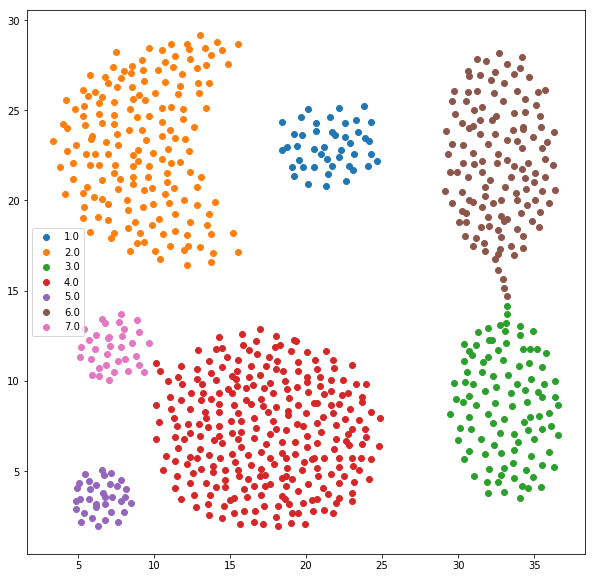

In [3]:
# Load data
X,y = load_labeled_data("data/labeled_Aggregation.txt")
plot_labeled(X,y)

In [4]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans, MeanShift
from sklearn.cluster import DBSCAN
#remember, it doesn't make sense to predict with clustering - there are no labels, so what would you even predict???

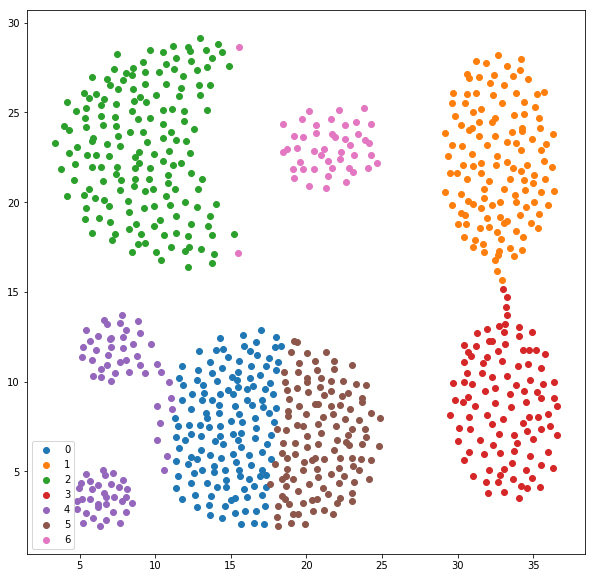

In [8]:
# k-means with 7 clusters
model = KMeans(n_clusters=7)
model.fit(X)
labels = model.predict(X)
plot_labeled(X, labels)
#you can run it again and get different clustering - it depends on how you randomly initialize the centers
#this one looks pretty much the same, but it's porbably because it's so well-defined

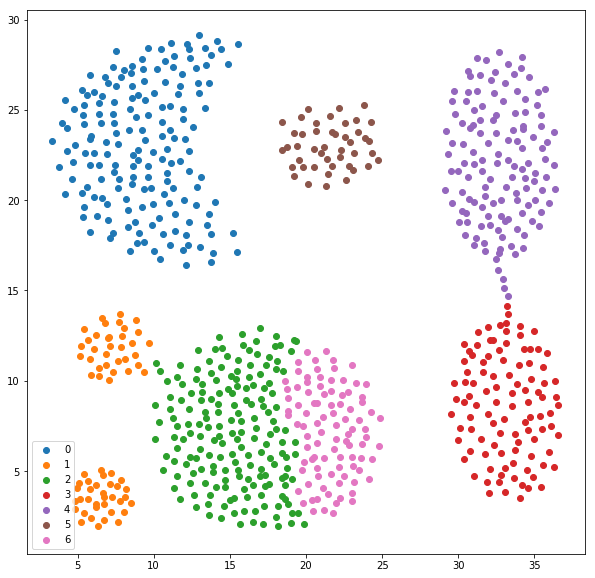

In [9]:
# Agglomerative Clustering
#hierarchical - start with many small clusters and start combining
model = AgglomerativeClustering(n_clusters=7)
model.fit(X)
#this model can't do predict because duh
labels = model.labels_
plot_labeled(X, labels)
#this one worked a little better, though it still seems to think the two left side dots are one cluster even though they're completely separate

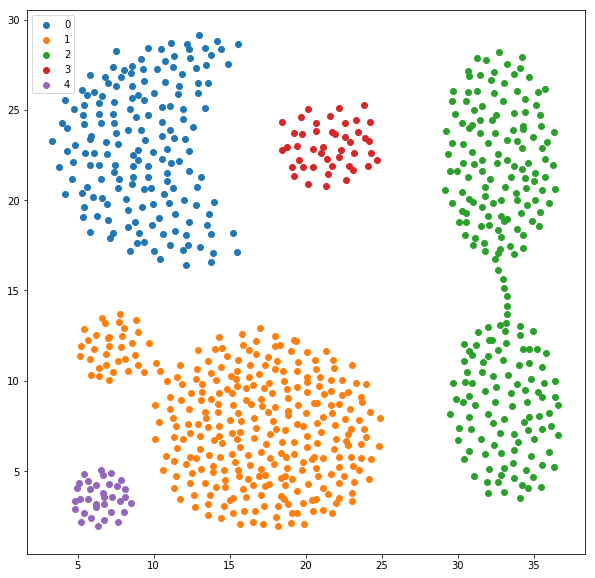

In [14]:
#DBSCAN
model = DBSCAN(eps=2)
model.fit(X)
labels = model.labels_
plot_labeled(X, labels)
# a label of -1 for DBSCAN means it's not part of a cluster

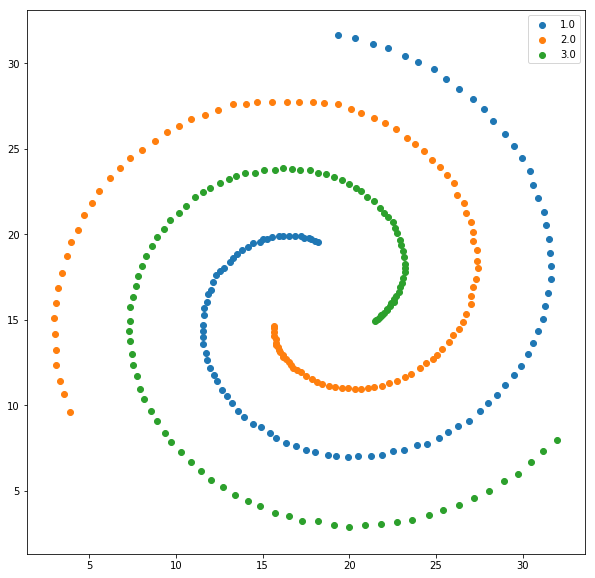

In [15]:
# Different dataset
X,y = load_labeled_data("data/labeled_Spiral.txt")
plot_labeled(X,y)

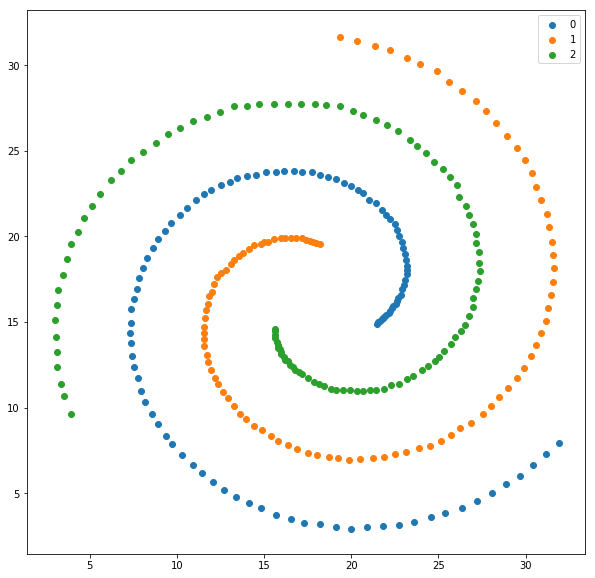

In [19]:
# DBSCAN
model=DBSCAN(eps=3)
model.fit(X)
labels = model.labels_
plot_labeled(X, labels)
#play with parameters until it works

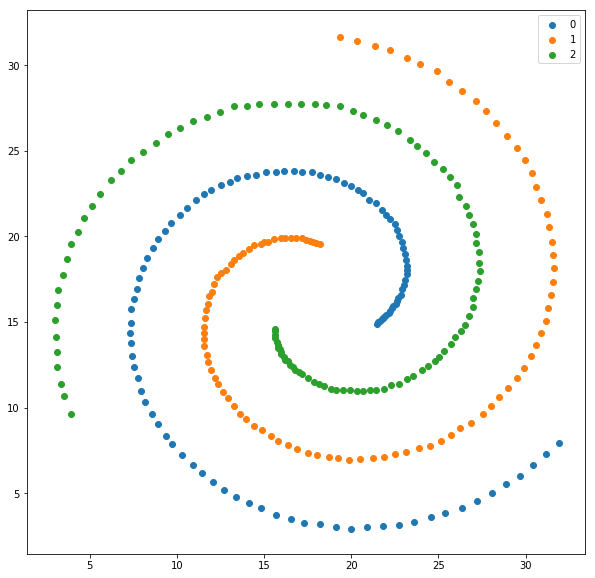

In [20]:
# tuning DBSCAN hyper parameters
model = DBSCAN(min_samples = 1, eps = 3)
model.fit(X)
labels = model.labels_
plot_labeled(X,labels)

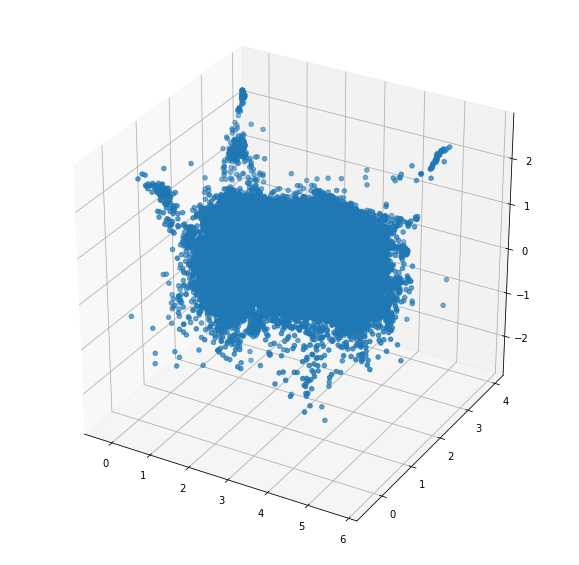

In [29]:
# 3D dataset
X = load_unlabeled_data("data/unlabeled_ConfLongDemo.txt")
plot_3D_unlabeled(X)

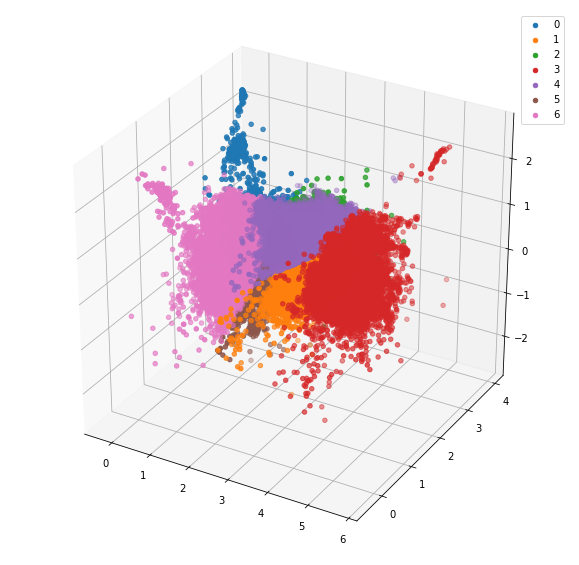

In [22]:
# clustering with k-means
model = KMeans(n_clusters=7)
model.fit(X)
labels = model.labels_
plot_3D_labeled(X, labels)

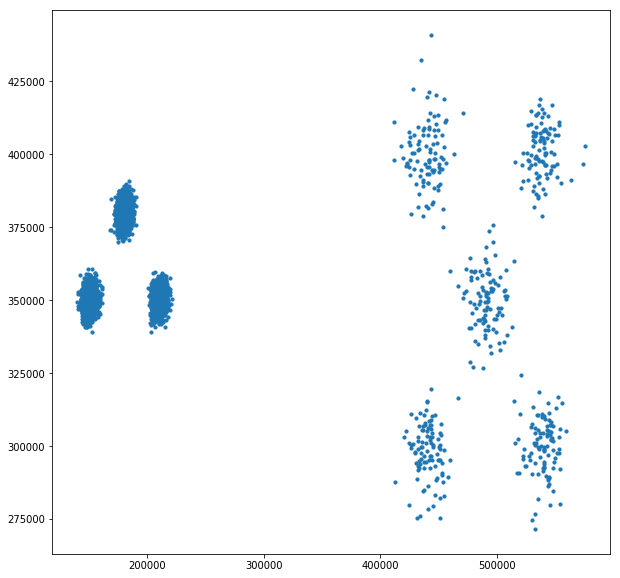

In [26]:
X = load_unlabeled_data("data/unlabeled_Unbalanced.txt")
plot_unlabeled(X)

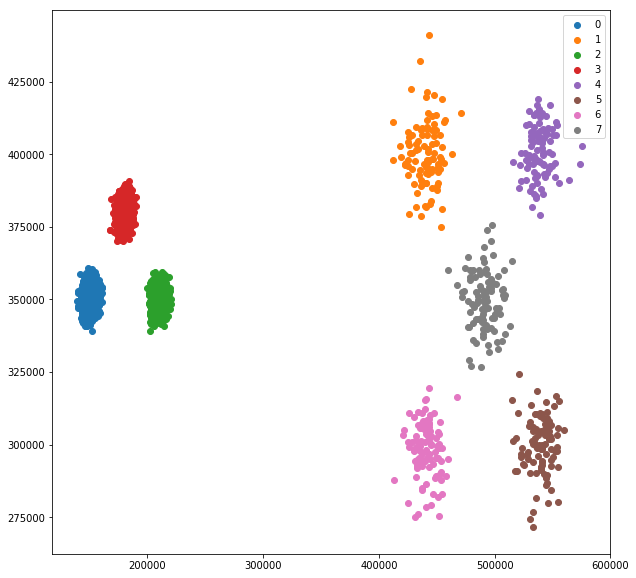

In [28]:
#Homework: try to cluster this data
model = KMeans(n_clusters=8)
model.fit(X)
labels = model.labels_
plot_labeled(X, labels)

# Short introduction to dimension reduction


Dimension reduction: reducing the dimension of the feature space for analysis or visualization

* Feature Elimination: reduce the feature space by eliminating features
* Feature Extraction: create “new” features, where each “new” feature is a combination of each of “old” features in a specific way. We keep as many of the new features as we want, and drop the “least important ones.”

### Principal Component Analysis

![](images/PCA_illustration.png)

Tutorial: https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

We have a 2-D dataset that we want to get down to 1-D. We can see that the data is scattered in one direction much more than the other. (As you can see, the principal components do not have to be normal to the axes.) We rank the principle components based on how much the data is scattered along the vector (first principle component, second principle component, third, etc). Then, we decide how many of our new features we want to work with - each new feature is a linear combination of old features. 

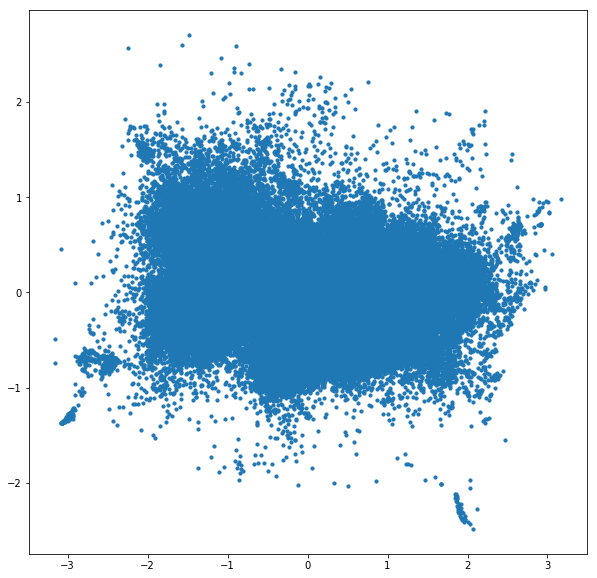

In [30]:
# PCA example with the 3D dataset
from sklearn.decomposition import PCA
model = PCA(n_components = 2)
model.fit(X)
X_transformed = model.transform(X)
plot_unlabeled(X_transformed)
#this function does it all for you! Because why do math when we have computers, right?
#Remember that we're not trying to predict anything or even cluster it, just make our data easier to visualize and deal with
#LOOK UP STANDARD SCALAR - for data sets whose features aren't numerically scaled, it's very important, and it will give ou different answers

In [31]:
print(model.explained_variance_ratio_)
#this means component 1 describes 72% of the data, and feature 2 explains 16% of the data. 
#Basically, a 2-D version of this data set still contains 87% of the variance

[0.72403206 0.15801337]


In [32]:
print(model.components_)
#The proportions of the original dimensions in the new model
#Remember that the new features are not interpretive - combined percentages of different features don't have physical meaning

[[ 0.97420437 -0.22535701  0.01183497]
 [-0.22079511 -0.9626975  -0.15640667]]


### MNIST Dataset

Dataset of handwritten digits. Each datapoint is a 28 * 28 image. THis means that this dataset has 28 x 28 = 784 dimensions. So, we definitely want to reduce the dimensions
![](images/MNIST.png)

In [33]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")
X = mnist.train.images[:5000]
y = mnist.train.labels[:5000]

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [34]:
X.shape

(5000, 784)

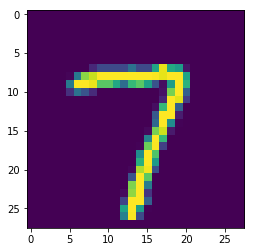

In [35]:
plot_MNIST(X[100])

(5000, 50)


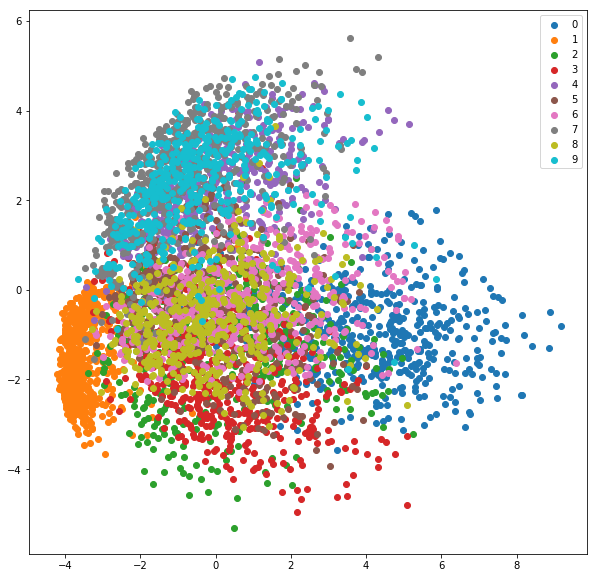

In [36]:
# MNIST with PCA (50 components)
from sklearn.decomposition import PCA
model = PCA(n_components=50)
model.fit(X)
X_transformed = model.transform(X)
print(X_transformed.shape)
plot_labeled(X_transformed,y)
#This does not look promising for the clustering methods that we know - everything's overlapped

In [37]:
print(model.explained_variance_ratio_)
print(sum(model.explained_variance_ratio_[:30]))
#Notice that, even in this 700+ dimension dataset,74% of the variance is explained by only 30 variables

[0.10575933 0.07077181 0.0616096  0.05463362 0.04806101 0.04397977
 0.03221922 0.02969605 0.02825223 0.02323566 0.02105071 0.02042647
 0.0172459  0.01682585 0.01610423 0.01531645 0.01285727 0.01260576
 0.01143337 0.01074918 0.01060954 0.01011593 0.00956801 0.0090135
 0.00837173 0.00820731 0.00800264 0.00773396 0.00699232 0.00691694
 0.00647223 0.00626727 0.0059536  0.00579895 0.00551557 0.00541561
 0.00503905 0.00479633 0.00476129 0.00463833 0.00445299 0.00427622
 0.00402548 0.00395662 0.00366739 0.0035373  0.00349488 0.00346787
 0.00329087 0.00321812]
0.7383653819561005


## Other methods
* https://towardsdatascience.com/dimensionality-reduction-toolbox-in-python-9a18995927cd
* https://colah.github.io/posts/2014-10-Visualizing-MNIST/

Look at these websites to learn more about the other means of reducing dimensions. However, only PCA has predictive power - for these, we can't place a new point on the map.

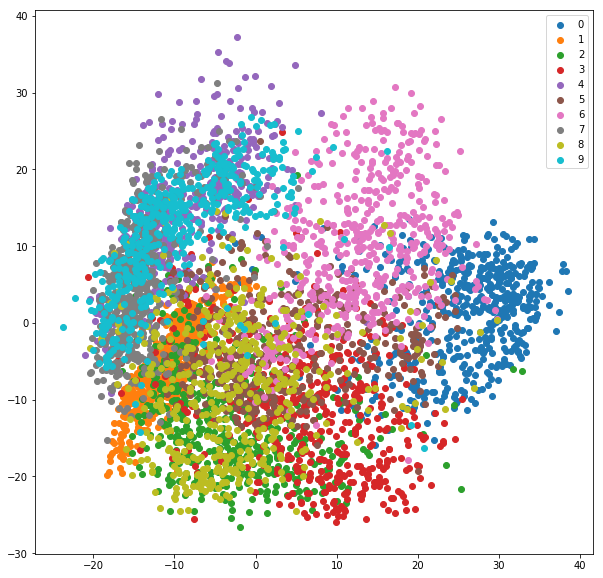

In [38]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2, n_neighbors = 5)
X_transformed = model.fit_transform(X)
plot_labeled(X_transformed,y)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.328s...
[t-SNE] Computed neighbors for 5000 samples in 35.383s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.234141
[t-SNE] Computed conditional probabilities in 0.266s
[t-SNE] Iteration 50: error = 88.9323883, gradient norm = 0.0053978 (50 iterations in 11.594s)
[t-SNE] Iteration 100: error = 83.0085678, gradient norm = 0.0085554 (50 iterations in 11.906s)
[t-SNE] Iteration 150: error = 82.1816483, gradient norm = 0.0029688 (50 iterations in 9.908s)
[t-SNE] Iteration 200: error = 82.0950012, gradient norm = 0.0030380 (50 iterations in 9.375s)
[t-SNE] Iteration 250: error = 82.0772400, gradient norm = 0.0045

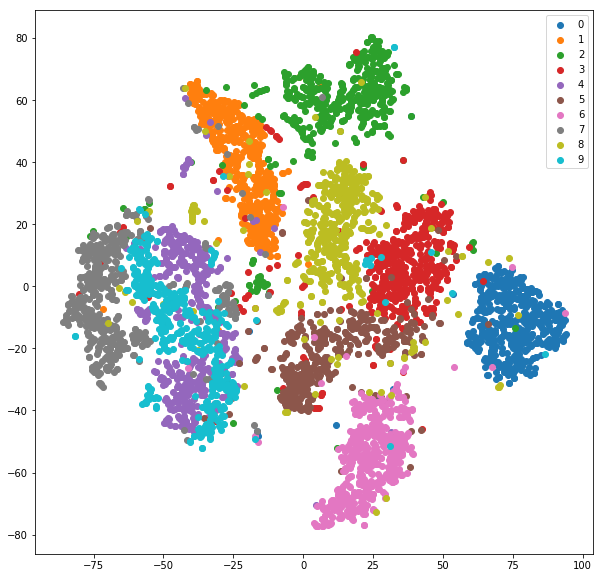

In [39]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2,learning_rate=300,perplexity = 30, verbose = 3)
X_transformed = model.fit_transform(X)
plot_labeled(X_transformed,y)

# Q&A Session